In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
gdf = gpd.read_file("Full Constituency Data.gpkg")

In [2]:
name_fix = {'Lab':'lab', 'Con':'con', 'LDem':'ld', 'Ref':'ref', 'Grn':'grn', 'Oth':'other', 'SNP':'snp', 'PC':'pc', np.nan:"other"}

In [4]:
bpdf = pd.read_csv("BritainElectsModel.csv")

bpdf.Win = bpdf.Win.map(name_fix)

In [5]:
for party in ["Lab", "Con", "LDem", "Grn", "SNP", "PC", "Ref", "Ind_Oth"]:
    bpdf[party] = bpdf[party].str[:-1].astype(float)

In [6]:
bpdf.fillna(0, inplace=True)

In [7]:
bpdf.rename(columns={"Constituency":"constituency"}, inplace=True)
df = pd.merge(gdf, bpdf, on="constituency")

In [8]:
party_colours = {"con":"#0087DC", "lab":"#E4003B", "ld":"#FAA61A", "grn":"#02A95B", "ref":"#12B6CF", "snp":"#FDF38E", "pc":"#005B54", "other":"#DCDCDC", np.nan:"#DCDCDC"}

In [9]:
df.rename(columns={"con_%_2019":"con_2019_%", "lab_%_2019":"lab_2019_%", "ld_%_2019":"ld_2019_%", "grn_%_2019":"grn_2019_%"}, inplace=True)

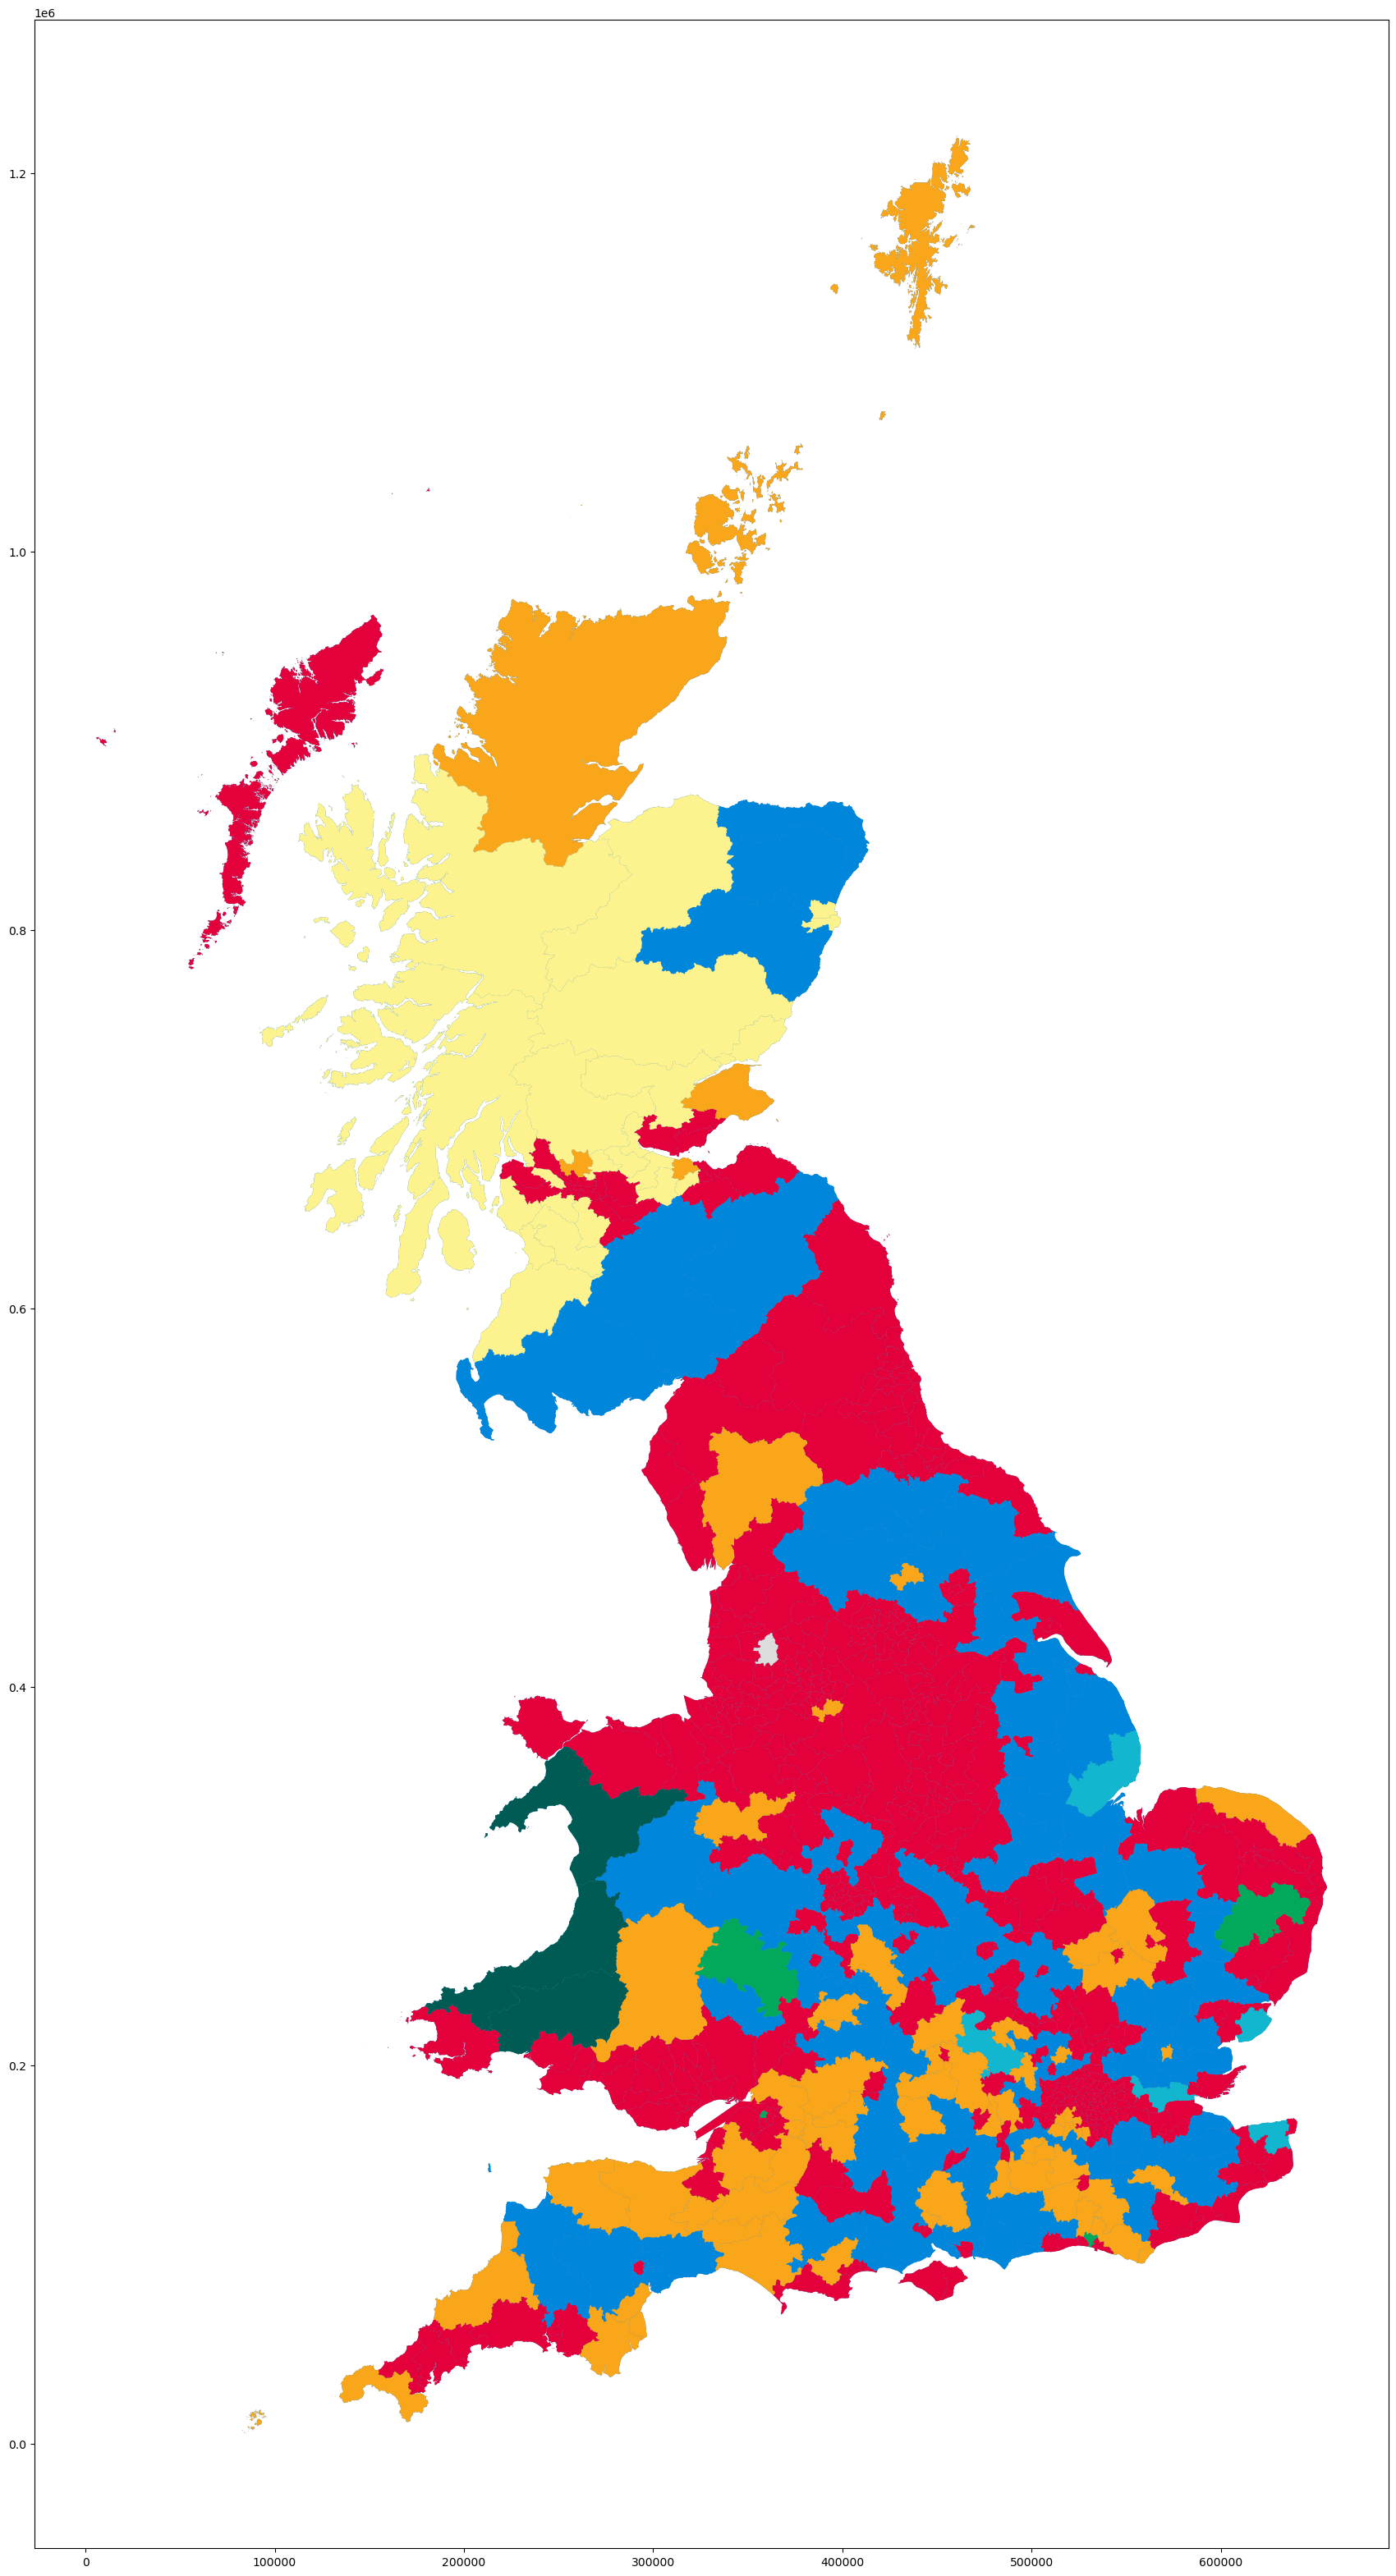

In [29]:
ax = df.plot(color=None, figsize=(40,40))
for party in df.Win.unique():
    df[df.Win == party].plot(ax=ax, color=party_colours[party])

In [10]:
scale_cols = ['LAT', 'LONG',
       'turnout', 'con_2019_%', 'lab_2019_%', 'ld_2019_%',
       'grn_2019_%', 'ref_2019_%', 'snp_2019_%', 'pc_2019_%', 'other_2019_%', 'Total population',
       'Number of households', 'Aged 15 years and under',
       'Aged 16 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 49 years',
       'Aged 50 to 64 years', 'Aged 65 years and over', 'United Kingdom',
       'Ireland', 'Other Europe', 'Africa', 'Middle East and Asia',
       'Americas and the Caribbean', 'Australasia and others', 'White British',
       'Other White', 'Asian / Asian British', 'Black / Black British',
       'Mixed / Multiple ethnic groups', 'Other ethnic groups', 'No religion',
       'Christian', 'Buddhist', 'Hindu', 'Jewish', 'Muslim', 'Sikh',
       'Other religion', 'Not answered', 'Owned outright',
       'Owned with a mortgage or loan', 'Private rented', 'Social rented',
       'Other tenure']

In [11]:
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools

In [12]:
rob = RobustScaler()
rob.fit(df[scale_cols])
df_scale = pd.DataFrame(rob.transform(df[scale_cols]), index=df.index, columns=scale_cols)

In [13]:
df_scale['country'] = df["country"]
df_scale['region'] = df['region']

In [14]:
pd.options.display.max_columns = None

In [15]:
df_scale = pd.get_dummies(df_scale, columns = ['country'], drop_first=True, prefix='c', dtype=int)
df_scale = pd.get_dummies(df_scale, columns = ['region'], drop_first=True, prefix='r', dtype=int)


In [16]:
df_scale = sm.add_constant(df_scale)

In [17]:
vif_cols = ['LONG', 'turnout', 'con_2019_%', 'lab_2019_%', 'ld_2019_%', 'grn_2019_%', 'ref_2019_%',
            'snp_2019_%', 'pc_2019_%', 'other_2019_%', 'Number of households',
            'Aged 16 to 24 years', 'Aged 35 to 49 years', 'Ireland',
            'Australasia and others', 'Christian', 'Buddhist', 'Hindu', 'Jewish',
            'Muslim', 'Sikh', 'Other religion', 'Not answered', 'Private rented',
            'Social rented', 'Other tenure', 'r_EM', 'r_GL', 'r_NE', 'r_NW', 'r_SE',
            'r_SW', 'r_WA', 'r_WM', 'r_YH']

fcols = ['const', 'con_2019_%', 'lab_2019_%',
        'ld_2019_%', 'grn_2019_%', 'ref_2019_%', 'snp_2019_%', 'pc_2019_%', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
        'Aged 35 to 49 years', 'Aged 50 to 64 years', 'Aged 65 years and over',
        'United Kingdom', 'Ireland', 'Other Europe', 'Africa',
        'Middle East and Asia', 'Americas and the Caribbean', 'White British', 'Other White',
        'Asian / Asian British', 'Black / Black British',
        'Mixed / Multiple ethnic groups', 'No religion',
        'Christian', 'Hindu', 'Jewish', 'Muslim', 'Sikh', 'Owned outright',
        'Owned with a mortgage or loan', 'Private rented', 'Social rented', 'r_EM', 'r_GL', 'r_NE', 'r_NW',
        'r_SC', 'r_SE', 'r_SW', 'r_WA', 'r_WM', 'r_YH']

fcols_wo_2019 = ['const', 'Number of households', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
        'Aged 35 to 49 years', 'Aged 50 to 64 years', 'Aged 65 years and over',
        'United Kingdom', 'Ireland', 'Other Europe', 'Africa',
        'Middle East and Asia', 'Americas and the Caribbean', 'White British', 'Other White',
        'Asian / Asian British', 'Black / Black British',
        'Mixed / Multiple ethnic groups', 'No religion',
        'Christian', 'Buddhist', 'Hindu', 'Jewish', 'Muslim', 'Sikh', 'Owned outright',
        'Owned with a mortgage or loan', 'Private rented', 'Social rented',
        'c_Scotland', 'c_Wales', 'r_EM', 'r_GL', 'r_NE', 'r_NW',
        'r_SC', 'r_SE', 'r_SW', 'r_WA', 'r_WM', 'r_YH']

vif_cols_2 = ['const', 'Number of households', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
       'Ireland', 'Americas and the Caribbean', 'Christian', 'Buddhist',
       'Hindu', 'Jewish', 'Muslim', 'Sikh', 'Owned with a mortgage or loan',
       'Social rented', 'r_EM', 'r_GL', 'r_NE', 'r_NW', 'r_SC', 'r_SE', 'r_SW',
       'r_WA', 'r_WM', 'r_YH']

In [18]:
df2 = df[["constituency"]].copy()

for party in ["Lab", "Con", "LDem", "Ref", "Grn", "Ind_Oth", "SNP", "PC"]:
       print(party)
       X = df_scale
       y = df[[party]]

       X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

       lr = sm.OLS(y_train, X_train[fcols], missing='drop')
       results = lr.fit()
       print(results.summary())

       y_pred = results.predict(X_train[fcols])
       rmse = statsmodels.tools.eval_measures.meanabs(y_train[party], y_pred)
       print(f"Train RMSE: {rmse}")

       y_test_pred = results.predict(X_test[fcols])
       rmse = statsmodels.tools.eval_measures.meanabs(y_test[party], y_test_pred)
       print(f"Test RMSE: {rmse}")

       X_train[party] = y_pred
       X_test[party] = y_test
       X = pd.concat([X_test, X_train])
       df2 = pd.merge(df2, X[party], left_index=True, right_index=True)

Lab
                            OLS Regression Results                            
Dep. Variable:                    Lab   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     313.9
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          1.20e-312
Time:                        09:40:49   Log-Likelihood:                -1281.3
No. Observations:                 505   AIC:                             2651.
Df Residuals:                     461   BIC:                             2837.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const   

In [19]:
df2["Winner"] = df2.loc[:,"Lab":"PC"].idxmax(axis=1)

In [20]:
df2.Winner = df2.Winner.map(name_fix)

In [21]:
df["LR Winner"] = df2["Winner"]

In [21]:
pd.options.display.max_rows = None
df[df["LR Winner"] != df["Win"]][["constituency", "Win", "LR Winner"]]

,constituency,Win,LR Winner
0,Aldershot,lab,con
6,Ashford,lab,con
25,Bexhill and Battle,lab,con
51,Boston and Skegness,ref,con
63,Bridgwater,lab,con
68,Bristol Central,grn,lab
83,Bury St Edmunds and Stowmarket,con,lab
91,Castle Point,ref,con
94,Chatham and Aylesford,lab,con
96,Chelmsford,ld,con


In [57]:
res = pd.read_csv("Results.csv")
res = res[["constituency", "2024_winner"]]
res

,constituency,2024_winner
0,Aberafan Maesteg,lab
1,Aberdeen North,snp
2,Aberdeen South,snp
3,Aberdeenshire North and Moray East,snp
4,Airdrie and Shotts,lab
...,...,...
627,Wythenshawe and Sale East,lab
628,Yeovil,ld
629,Ynys Mon,pc
630,York Central,lab


In [49]:
df = df.sort_values("constituency")

In [58]:
df = pd.merge(df, res, on="constituency")

In [61]:
df[["constituency", "2024_winner_y"]]

,constituency,2024_winner_y
0,Aberafan Maesteg,lab
1,Aberdeen North,snp
2,Aberdeen South,snp
3,Aberdeenshire North and Moray East,snp
4,Airdrie and Shotts,lab
...,...,...
627,Wythenshawe and Sale East,lab
628,Yeovil,ld
629,Ynys Mon,pc
630,York Central,lab


In [62]:
len(df[df["LR Winner"] == df["2024_winner_y"]]) / 632

0.8449367088607594

In [42]:
df[["constituency", "LR Winner", "real_Winner"]]

,constituency,LR Winner,real_Winner
600,Aberafan Maesteg,lab,lab
548,Aberdeen North,snp,lab
549,Aberdeen South,snp,lab
550,Aberdeenshire North and Moray East,snp,lab
551,Airdrie and Shotts,lab,ld
...,...,...,...
539,Wythenshawe and Sale East,lab,lab
540,Yeovil,ld,lab
631,Ynys Mon,lab,lab
541,York Central,lab,lab


In [221]:
df["LR Winner"].unique()

array(['con', 'lab', 'ld', 'grn', nan, 'snp', 'pc'], dtype=object)

C:\Users\matth\AppData\Local\Temp\ipykernel_3832\949179802.py:3: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  df[df["LR Winner"] == party].plot(ax=ax, color=party_colours[party], edgecolor="none")


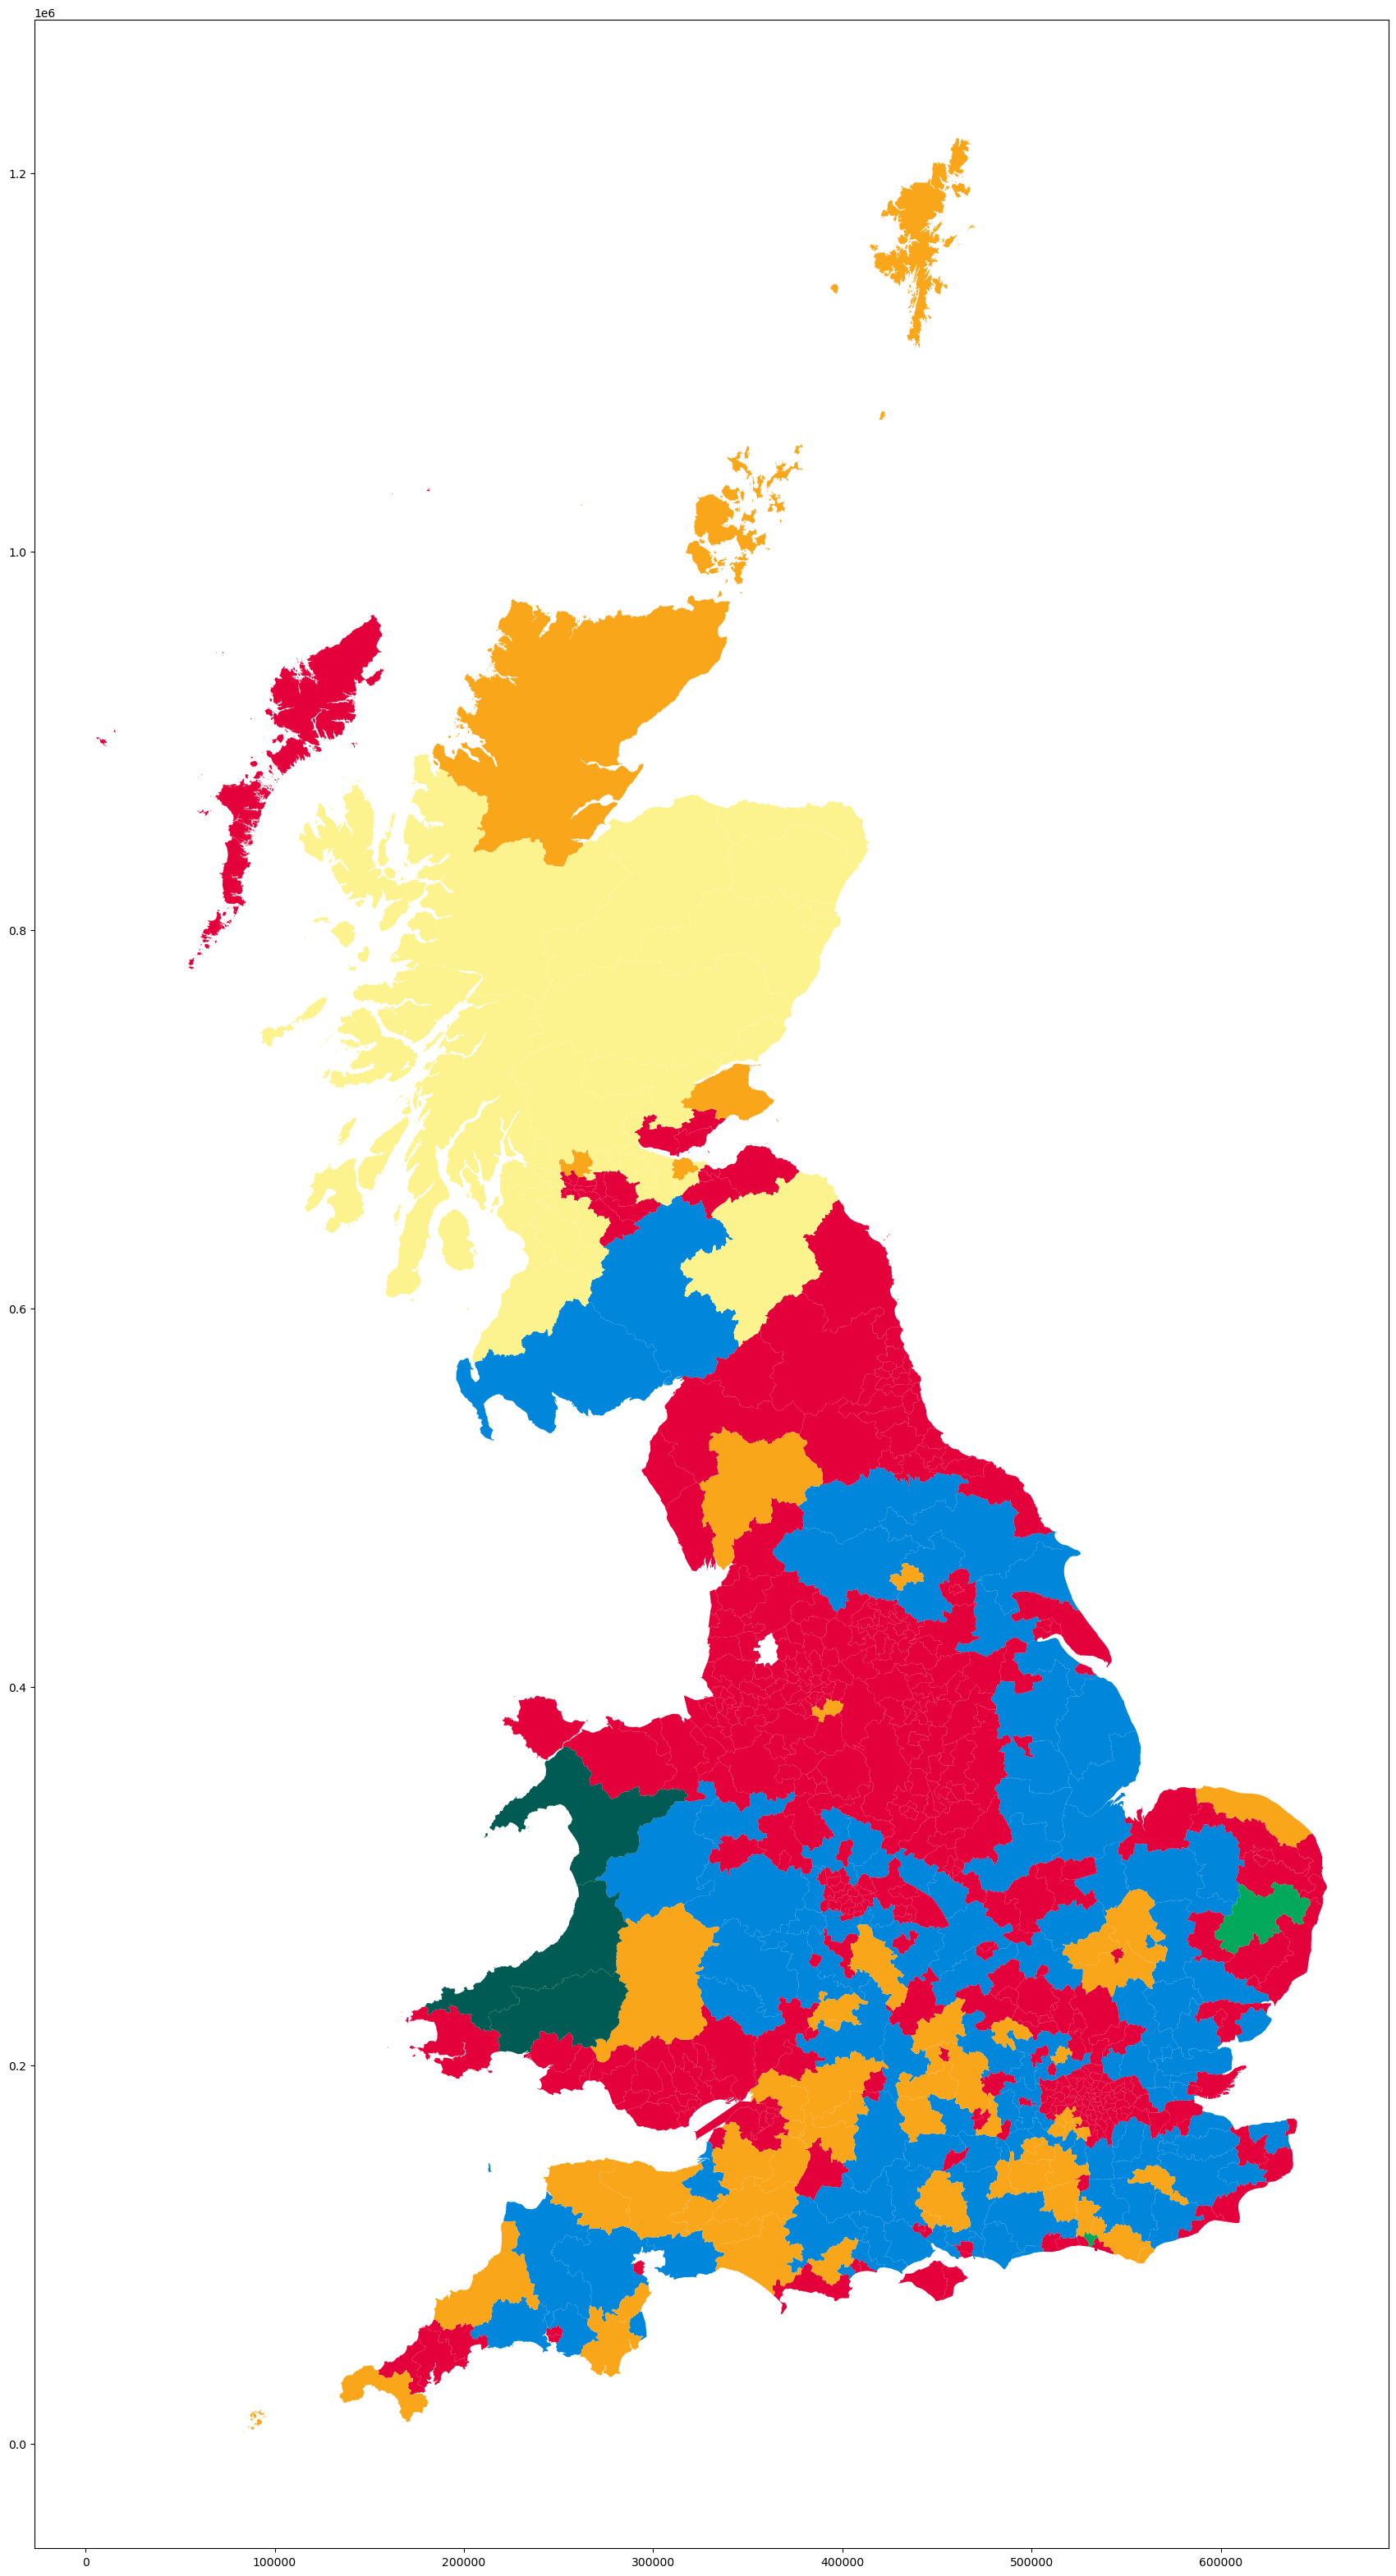

In [22]:
ax = df.plot(color="none", figsize=(40,40), edgecolor="none")
for party in df["LR Winner"].unique():
    df[df["LR Winner"] == party].plot(ax=ax, color=party_colours[party], edgecolor="none")

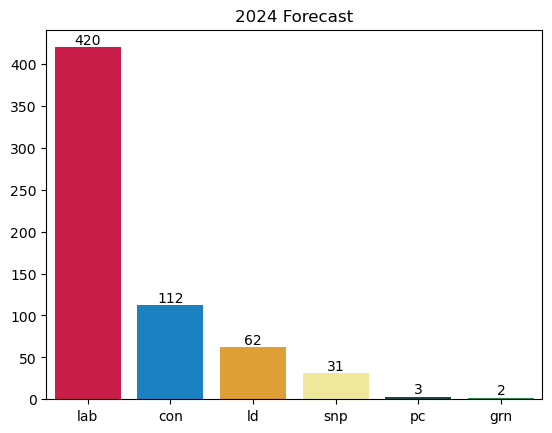

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["LR Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["LR Winner"].value_counts().values, x=list(df["LR Winner"].value_counts().index), hue=df["LR Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2024 Forecast")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [158]:
def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [210]:
x = calculate_vif(X_train[fcols_wo_2019])

c:\Users\matth\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'c_Scotland' at index: 29
dropping 'c_Wales' at index: 29
dropping 'United Kingdom' at index: 7
dropping 'White British' at index: 12
dropping 'Owned outright' at index: 23
dropping 'No religion' at index: 16
dropping 'Asian / Asian British' at index: 13
dropping 'Aged 65 years and over' at index: 6
dropping 'Other White' at index: 11
dropping 'Middle East and Asia' at index: 9
dropping 'Africa' at index: 8
dropping 'Aged 50 to 64 years' at index: 5
dropping 'const' at index: 0
dropping 'Private rented' at index: 16
dropping 'Aged 35 to 49 years' at index: 3
dropping 'Mixed / Multiple ethnic groups' at index: 7
dropping 'Other Europe' at index: 4
dropping 'Black / Black British' at index: 5
Remaining variables:
Index(['Number of households', 'Aged 16 to 24 years', 'Aged 25 to 34 years',
       'Ireland', 'Americas and the Caribbean', 'Christian', 'Buddhist',
       'Hindu', 'Jewish', 'Muslim', 'Sikh', 'Owned with a mortgage or loan',
       'Social rented', 'r_EM', 'r_GL', 'r_